## Data Pipeline: Bronze to Silver Layer Transformation

In [3]:
# Importing essential libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import*

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 5, Finished, Available, Finished)

In [4]:
# Initializing Spark Session
spark = SparkSession.builder.getOrCreate()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 6, Finished, Available, Finished)

### Loading Hotel Booking Data from Bronze Folder
This section loads the hotel booking data from a CSV file located in the Bronze folder.

In [5]:
#Loading the csv file from the Bronze folder
df = spark.read.format('csv') \
    .option("header", "true") \
    .load('Files/Bronze/Hotel Revenue.csv')
df.limit(5).toPandas()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 7, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,01/01/2024,1,1,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
1,02/01/2024,1,2,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None
2,03/01/2024,1,3,Winter,0,70000,90000,49000,0.8,130,...,80,4.7,0.8,49000,58000,11000,7000,76000,14000,None
3,04/01/2024,1,4,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
4,05/01/2024,1,5,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None


## Data Quality Assessment and Preprocessing (Identifying Issues in the Data)
 This section performs a series of data quality checks and preprocessing steps.

In [6]:
# Checking the Schema 
df.printSchema()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 8, Finished, Available, Finished)

root
 |-- Date: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Holiday: string (nullable = true)
 |-- Marketing_Spend: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Room_Revenue: string (nullable = true)
 |-- Occupancy_Rate: string (nullable = true)
 |-- ADR: string (nullable = true)
 |-- RevPAR: string (nullable = true)
 |-- Available_Rooms: string (nullable = true)
 |-- Reserved_Rooms: string (nullable = true)
 |-- Booking_Channel: string (nullable = true)
 |-- Guest_Type: string (nullable = true)
 |-- Market_Segment: string (nullable = true)
 |-- Guest_Country: string (nullable = true)
 |-- Complaints: string (nullable = true)
 |-- Compliment: string (nullable = true)
 |-- Bookings: string (nullable = true)
 |-- No_Shows: string (nullable = true)
 |-- Cancellations: string (nullable = true)
 |-- Checkouts: string (nullable = true)
 |-- New_Bookings: string (nullabl

#### All the data fields (columns) are in string format. We need to convert them to appropriate data types to enable proper analysis, calculations, filtering, and visualizations.

In [7]:
# record count
df.count()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 9, Finished, Available, Finished)

109

In [8]:
# Checking for missing values(to spot nulls, blanks and missing info)
from pyspark.sql.functions import col, when, count

# Count of null or blank ("") values per column
def row_missing_values(dataframe):
    # Count of null or blank ("") values per column
    dataframe = dataframe.select([
        count(when(col(c).isNull() | (col(c) == ""), c)).alias(c)
        for c in df.columns
    ]).limit(1).toPandas()
    return dataframe

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 10, Finished, Available, Finished)

In [9]:
# Checking for missing values per row in our df
row_missing_values(df)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 11, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109


In [10]:
# finding the entire Column with no data
def column_available_values(dataframe):
    dataframe = dataframe.select([
        count(when(col(c).isNotNull(), c)).alias(c)
        for c in df.columns
    ]).limit(1).toPandas()
    return dataframe

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 12, Finished, Available, Finished)

In [11]:
# finding the entire Column with no data
column_available_values(df)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 13, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,0


#### After counting 109 records, we found no missing values in any row or column, except for the 'Profit' column, which appears uncalculated.

### Visual Distribution
#### Starting with numerical data, followed by categorical data.
This step helps us detect outliers, spot missing patterns or gaps, identify data entry issues like typos or inconsistencies, and understand which ranges or categories dominate. Visual distributions provide quick insights into the shape, spread, and balance of our data—critical for guiding further analysis and cleaning.

In [12]:
# Getting all column names with StringType (since all columns are currently strings)
all_col_names = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]
print(all_col_names)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 14, Finished, Available, Finished)

['Date', 'Month', 'Weekday', 'Season', 'Holiday', 'Marketing_Spend', 'Revenue', 'Room_Revenue', 'Occupancy_Rate', 'ADR', 'RevPAR', 'Available_Rooms', 'Reserved_Rooms', 'Booking_Channel', 'Guest_Type', 'Market_Segment', 'Guest_Country', 'Complaints', 'Compliment', 'Bookings', 'No_Shows', 'Cancellations', 'Checkouts', 'New_Bookings', 'Checkins', 'Average_Review_Score', 'Revenue_Managed_Guests', 'RevPAR_Managed_Guests', 'Occupancy_Managed_Guests', 'RevPAR_All', 'Occupancy_All', 'Room_Revenue_All', 'Total_Revenue', 'Operating_Expenses', 'Fixed_Costs', 'Variable_Costs', 'Total_Costs', 'Profit']


In [13]:
# Copy all column names to start building the numeric column list
num_col_names = all_col_names[:]

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 15, Finished, Available, Finished)

In [14]:
# Creating list of categorical column names
cat_col_names = ['Month', 'Weekday', 'Season', 'Holiday', 'Booking_Channel', 'Guest_Type', 'Guest_Country', 'Date']

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 16, Finished, Available, Finished)

In [15]:
# Creating numerical column list by removing categorical one
num_col_names = [col for col in all_col_names if col not in cat_col_names]
print(num_col_names)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 17, Finished, Available, Finished)

['Marketing_Spend', 'Revenue', 'Room_Revenue', 'Occupancy_Rate', 'ADR', 'RevPAR', 'Available_Rooms', 'Reserved_Rooms', 'Market_Segment', 'Complaints', 'Compliment', 'Bookings', 'No_Shows', 'Cancellations', 'Checkouts', 'New_Bookings', 'Checkins', 'Average_Review_Score', 'Revenue_Managed_Guests', 'RevPAR_Managed_Guests', 'Occupancy_Managed_Guests', 'RevPAR_All', 'Occupancy_All', 'Room_Revenue_All', 'Total_Revenue', 'Operating_Expenses', 'Fixed_Costs', 'Variable_Costs', 'Total_Costs', 'Profit']


In [16]:
# Creating a Dataframe for categorical data
categorical_df = df.select(cat_col_names)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 18, Finished, Available, Finished)

In [17]:
# creating a Dataframe for numerical data
numerical_df = df.select(num_col_names)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 19, Finished, Available, Finished)

In [18]:
# converting the categorical_df to pandas
categorical_pdf = categorical_df.toPandas()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 20, Finished, Available, Finished)

In [19]:
# converting the numerical data frame to pandas
numerical_pdf = numerical_df.toPandas()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 21, Finished, Available, Finished)

#### Distribution visuallizalion

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

%matplotlib inline

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 22, Finished, Available, Finished)

In [21]:
def distribution_visuals(column_names, dataframe):
    # Set up visual style
    sns.set(style="whitegrid")
    
    # Choose how many plots per row
    plots_per_row = 3
    num_cols = len(column_names)
    num_rows = math.ceil(num_cols / plots_per_row)
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))
    axes = axes.flatten()  # Flatten to 1D for easy looping
    
    # Plot each column
    for i, col in enumerate(column_names):
        sns.histplot(dataframe[col].dropna(), bins=50, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel("Frequency")
    
    # Hide unused subplots (if any)numerical_pdf
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 23, Finished, Available, Finished)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 24, Finished, Available, Finished)

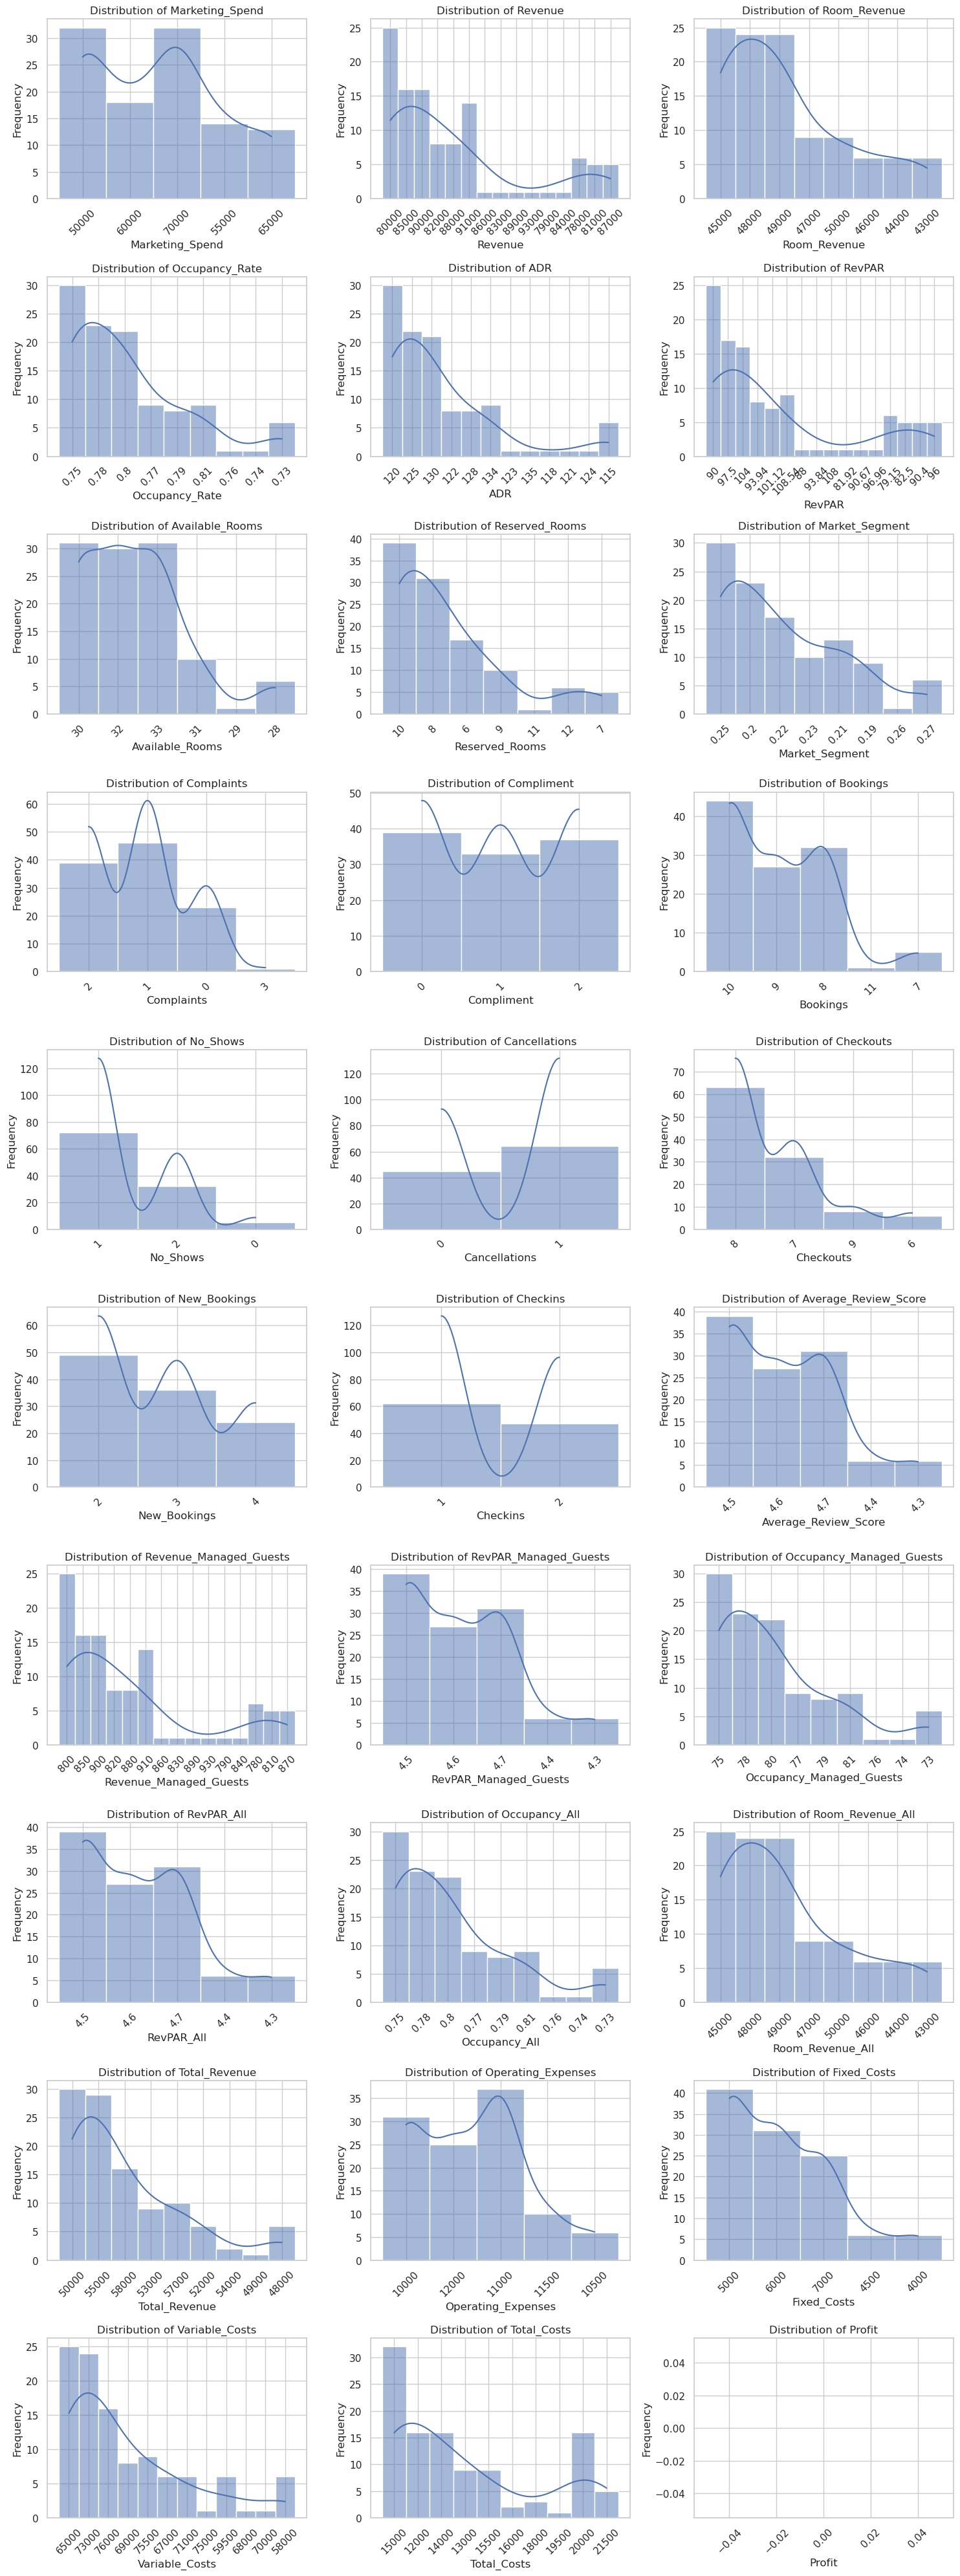

In [22]:
# visual distribution for numerical data
distribution_visuals(num_col_names, numerical_pdf)

##### Numerical Data Insights
The data appears clean with no visible anomalies, except the profit ditribution which we expected to have no data at this stage. We mainly observe trends and patterns across the columns, which we'll explore further to understand what factors contribute to them. Additionally, the value ranges give us an idea of the scale and variation in metrics such as revenue, bookings, and Variable costs.

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 25, Finished, Available, Finished)

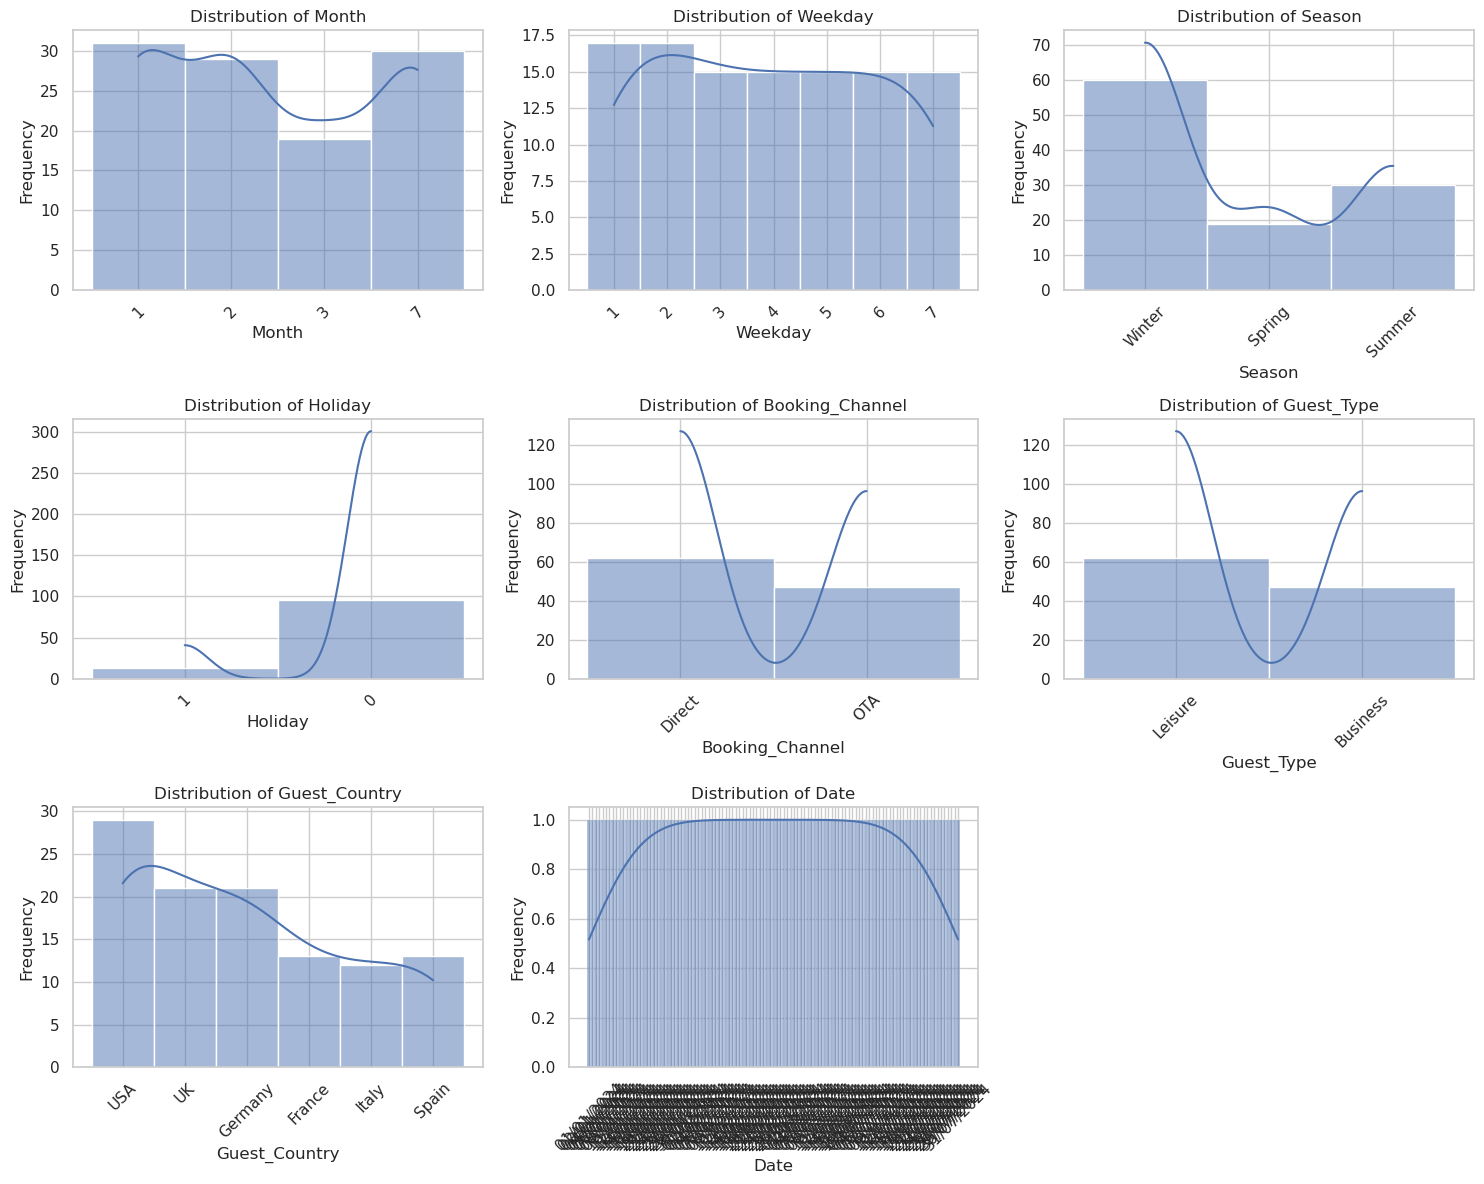

In [23]:
# visual distribution for categorical data
distribution_visuals(cat_col_names, categorical_pdf)

### Categorical Data Review

- The `Month` column is missing some months, likely due to hotel closures during low-demand periods to save costs. I will confirm this later by checking the `Date` column to ensure those months have no data entries.  
- Both `Month` and `Weekday` columns are still in numeric format.  
- The `Date` column was added, but its values are clustered and overlapping on the x-axis since it's still in string format.  
- This has led to visuals that aren’t bell-shaped or well-distributed, which is expected at this stage.  
- I’ll revisit this step after cleaning to ensure formatting and distributions are correct.

### Data Transformation: Converting Numeric Values to Descriptive Labels  
This section transforms numerical data into more descriptive labels for better readability:  
- Converts the `Date` column format to yyyy-MM-dd (Required by PySpark).  
- Converts the `Month` column from integers to month names (e.g., 1 to "January").  
- Transforms the `Weekday` column from numeric values to day names (e.g., 1 to "Monday").  
- Converts binary values in the `Holiday` column to "Yes" or "No" labels to indicate whether a day is a holiday.  
- Calculates the `Profit` by subtracting total costs from total revenue and populates the column accordingly.

In [24]:
# Converting the dataframe to pandas
pdf = df.toPandas()
pdf.head(2)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 26, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,01/01/2024,1,1,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
1,02/01/2024,1,2,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None


In [25]:
# 2. Converting 'Date' to datetime with expected format
pdf['Date'] = pd.to_datetime(pdf['Date'], format='%d/%m/%Y', errors='coerce')

# 3. Formatting the datetime column to yyyy-MM-dd 
pdf['Date'] = pdf['Date'].dt.strftime('%Y-%m-%d')

pdf.head(5)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 27, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-01-01,1,1,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
1,2024-01-02,1,2,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None
2,2024-01-03,1,3,Winter,0,70000,90000,49000,0.8,130,...,80,4.7,0.8,49000,58000,11000,7000,76000,14000,None
3,2024-01-04,1,4,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
4,2024-01-05,1,5,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None


In [26]:
# ensuring 'Month' is integer
pdf['Month'] = pdf['Month'].astype(int)

# Mapping month numbers to month names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

pdf['Month'] = pdf['Month'].map(month_mapping)

# View first 2 rows
pdf.head(2)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 28, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-01-01,January,1,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
1,2024-01-02,January,2,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None


In [27]:
# Converting 'Weekday' to integer
pdf['Weekday'] = pdf['Weekday'].astype(int)

# Mapping weekday numbers to weekday names
weekday_mapping = {
    1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday",
    5: "Friday", 6: "Saturday", 7: "Sunday"
}

# Using map with fillna for unknown cases
pdf['Weekday'] = pdf['Weekday'].map(weekday_mapping).fillna('Unknown')

# Showing first 3 rows
pdf.head(3)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 29, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-01-01,January,Monday,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
1,2024-01-02,January,Tuesday,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None
2,2024-01-03,January,Wednesday,Winter,0,70000,90000,49000,0.8,130,...,80,4.7,0.8,49000,58000,11000,7000,76000,14000,None


In [28]:
# converting 'Holiday' column to integer type 
pdf['Holiday'] = pdf['Holiday'].astype(int)

# Mapping 0 and 1 to "No" and "Yes"
holiday_mapping = {
    1: "Yes",
    0: "No"
}

# Applying the mapping
pdf['Holiday'] = pdf['Holiday'].map(holiday_mapping).fillna("No")

pdf.head(2)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 30, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-01-01,January,Monday,Winter,Yes,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,None
1,2024-01-02,January,Tuesday,Winter,No,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,None


In [29]:
from notebookutils import mssparkutils

# Converting TotalRevenue and TotalCost to numeric
pdf['Total_Revenue'] = pd.to_numeric(pdf['Total_Revenue'], errors='coerce')
pdf['Total_Costs'] = pd.to_numeric(pdf['Total_Costs'], errors='coerce')

# calculating 'Profit'
pdf['Profit'] = pdf['Total_Revenue'] - pdf['Total_Costs']
pdf.head(2)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 31, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-01-01,January,Monday,Winter,Yes,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,35000
1,2024-01-02,January,Tuesday,Winter,No,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,43000


In [30]:
# Convert to Spark DataFrame
df = spark.createDataFrame(pdf)

# Save to the Lakehouse Files area under bronze folder
df.write.mode("overwrite").option("header", True).csv("Files/Silver/hotelbook_silver")

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 32, Finished, Available, Finished)

### PySpark Schema Definition for Hotel Data
This schema defines the structure of the hotel dataset, specifying data types and whether fields are nullable.

In [31]:
from pyspark.sql.types import*

# Define the schema for the data
hotelSchema = StructType([
    StructField("Date", DateType(), True),
    StructField("Month", StringType(), True),
    StructField("Weekday", StringType(), True),
    StructField("Season", StringType(), True),
    StructField("Holiday", StringType(), True),
    StructField("Marketing_Spend", FloatType(), True),
    StructField("Revenue", FloatType(), True),
    StructField("Room_Revenue", FloatType(), True),
    StructField("Occupancy_Rate", FloatType(), True),
    StructField("ADR", FloatType(), True),
    StructField("RevPAR", FloatType(), True),
    StructField("Available_Rooms", IntegerType(), True),
    StructField("Reserved_Rooms", IntegerType(), True),
    StructField("Booking_Channel", StringType(), True),
    StructField("Guest_Type", StringType(), True),
    StructField("Market_Segment", FloatType(), True),
    StructField("Guest_Country", StringType(), True),
    StructField("Complaints", IntegerType(), True),
    StructField("Compliment", IntegerType(), True),
    StructField("Bookings", IntegerType(), True),
    StructField("No_Shows", IntegerType(), True),
    StructField("Cancellations", IntegerType(), True),
    StructField("Checkouts", IntegerType(), True),
    StructField("New_Bookings", IntegerType(), True),
    StructField("Checkins", IntegerType(), True),
    StructField("Average_Review_Score", FloatType(), True),
    StructField("Revenue_Managed_Guests", FloatType(), True),
    StructField("RevPAR_Managed_Guests", FloatType(), True),
    StructField("Occupancy_Managed_Guests", IntegerType(), True),
    StructField("RevPAR_All", FloatType(), True),
    StructField("Occupancy_All", FloatType(), True),
    StructField("Room_Revenue_All", FloatType(), True),
    StructField("Total_Revenue", FloatType(), True),
    StructField("Operating_Expenses", FloatType(), True),
    StructField("Fixed_Costs", FloatType(), True),
    StructField("Variable_Costs", FloatType(), True),
    StructField("Total_Costs", FloatType(), True),
    StructField("Profit", FloatType(), True)
])

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 33, Finished, Available, Finished)

### The Rinse and Cleaning Stage  
Now that the initial data cleaning and transformation steps are complete, we proceed to validate the results. This involves checking for any introduced errors, verifying data consistency, and ensuring all columns are in the expected formats.

### Loading Hotel Booking Data from Bronze Folder
This section loads the hotel booking data from a CSV file located in the Bronze folder, applying the defined schema for structured data processing.

In [32]:
#Loading the csv file from the Bronze folder
df = spark.read.format('csv') \
    .option("header", "true") \
    .schema(hotelSchema) \
    .load('Files/Silver/hotelbook_silver') 
df.limit(3).toPandas()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 34, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-02-10,February,Saturday,Winter,No,65000.0,88000.0,49000.0,0.79,128.0,...,79,4.5,0.79,49000.0,55000.0,12000.0,6000.0,73000.0,15000.0,40000.0
1,2024-02-11,February,Sunday,Winter,No,70000.0,91000.0,50000.0,0.81,134.0,...,81,4.7,0.81,50000.0,57000.0,11500.0,7000.0,75500.0,15500.0,41500.0
2,2024-02-12,February,Monday,Winter,No,50000.0,80000.0,45000.0,0.75,120.0,...,75,4.5,0.75,45000.0,50000.0,10000.0,5000.0,65000.0,15000.0,35000.0


In [33]:
# check the schema
df.printSchema()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 35, Finished, Available, Finished)

root
 |-- Date: date (nullable = true)
 |-- Month: string (nullable = true)
 |-- Weekday: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Holiday: string (nullable = true)
 |-- Marketing_Spend: float (nullable = true)
 |-- Revenue: float (nullable = true)
 |-- Room_Revenue: float (nullable = true)
 |-- Occupancy_Rate: float (nullable = true)
 |-- ADR: float (nullable = true)
 |-- RevPAR: float (nullable = true)
 |-- Available_Rooms: integer (nullable = true)
 |-- Reserved_Rooms: integer (nullable = true)
 |-- Booking_Channel: string (nullable = true)
 |-- Guest_Type: string (nullable = true)
 |-- Market_Segment: float (nullable = true)
 |-- Guest_Country: string (nullable = true)
 |-- Complaints: integer (nullable = true)
 |-- Compliment: integer (nullable = true)
 |-- Bookings: integer (nullable = true)
 |-- No_Shows: integer (nullable = true)
 |-- Cancellations: integer (nullable = true)
 |-- Checkouts: integer (nullable = true)
 |-- New_Bookings: integer (nullabl

**Schema Validation**: All columns have been assigned appropriate data types based on their content (e.g., numeric types for revenue and costs, string types for categorical values), replacing the initial uniform string format.

In [34]:
# record count
df.count()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 36, Finished, Available, Finished)

109

**Record Count Integrity**: Verified that the dataset still contains 109 records — no data was lost during transformation.

In [35]:
# Checking for missing values per row in our df
row_missing_values(df)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 37, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# finding the entire Column with no data
column_available_values(df)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 38, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


**Missing Values Check**: All columns maintain the same count of missing values per row and column as before cleaning. The `Profit` column has now been populated by computing `Total_Revenue - Total_Costs`, eliminating any previously missing values.

#### Visual Distributions

In [37]:
from pyspark.sql.types import NumericType
# Creating a list of numeric columns names
numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]
print(numeric_cols)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 39, Finished, Available, Finished)

['Marketing_Spend', 'Revenue', 'Room_Revenue', 'Occupancy_Rate', 'ADR', 'RevPAR', 'Available_Rooms', 'Reserved_Rooms', 'Market_Segment', 'Complaints', 'Compliment', 'Bookings', 'No_Shows', 'Cancellations', 'Checkouts', 'New_Bookings', 'Checkins', 'Average_Review_Score', 'Revenue_Managed_Guests', 'RevPAR_Managed_Guests', 'Occupancy_Managed_Guests', 'RevPAR_All', 'Occupancy_All', 'Room_Revenue_All', 'Total_Revenue', 'Operating_Expenses', 'Fixed_Costs', 'Variable_Costs', 'Total_Costs', 'Profit']


In [38]:
# Creating a list of categorical columns names with date columns included
categoric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]
categoric_cols.insert(0, "Date")
print(categoric_cols)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 40, Finished, Available, Finished)

['Date', 'Month', 'Weekday', 'Season', 'Holiday', 'Booking_Channel', 'Guest_Type', 'Guest_Country']


In [39]:
# Creating a numeric dataframe
numeric_df = df.select(numeric_cols)
# converting the numeric dataframe to pandas
numeric_df = numeric_df.toPandas()
numeric_df.head(2)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 41, Finished, Available, Finished)

,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,RevPAR,Available_Rooms,Reserved_Rooms,Market_Segment,Complaints,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,65000.0,88000.0,49000.0,0.79,128.0,101.120003,32,10,0.21,2,...,79,4.5,0.79,49000.0,55000.0,12000.0,6000.0,73000.0,15000.0,40000.0
1,70000.0,91000.0,50000.0,0.81,134.0,108.540001,33,8,0.19,1,...,81,4.7,0.81,50000.0,57000.0,11500.0,7000.0,75500.0,15500.0,41500.0


In [40]:
# creating a categorical dataframe
categoric_df = df.select(categoric_cols)
# converting the categorical dataframe to pandas
categoric_df = categoric_df.toPandas()
categoric_df.head(2)

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 42, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Booking_Channel,Guest_Type,Guest_Country
0,2024-02-10,February,Saturday,Winter,No,Direct,Leisure,Italy
1,2024-02-11,February,Sunday,Winter,No,OTA,Business,Spain


#### Numerical data Visual distribution.

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 43, Finished, Available, Finished)

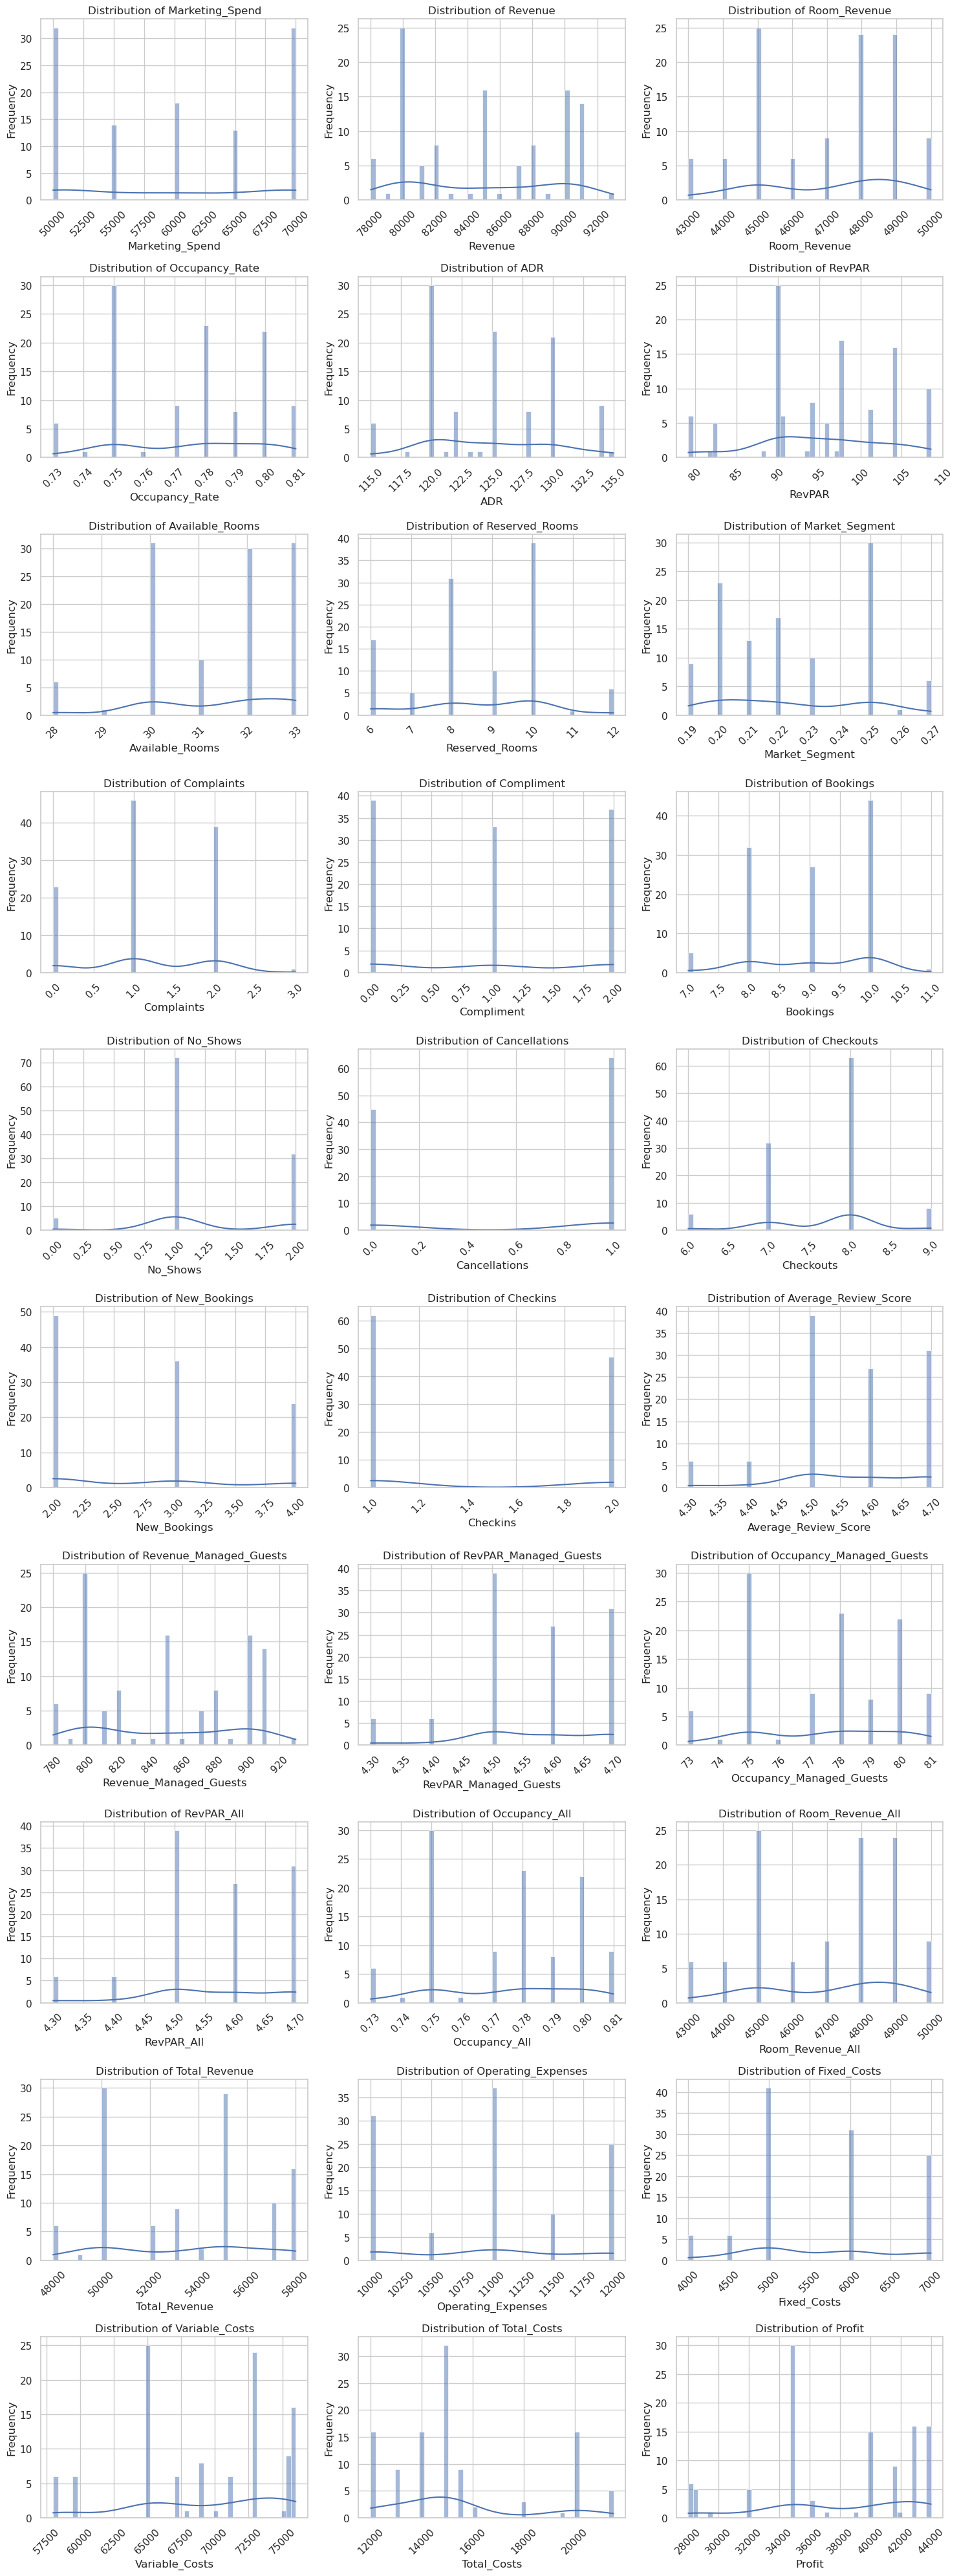

In [41]:
# visual distribution for numerical data
distribution_visuals(numeric_cols, numeric_df)

**Numerical Distribution Check**: Visual inspection of numeric features shows no abnormalities or extreme outliers. Trends observed earlier are consistent and will be further explored to understand their causes.

#### Categorical Data Visual Distribution

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 44, Finished, Available, Finished)

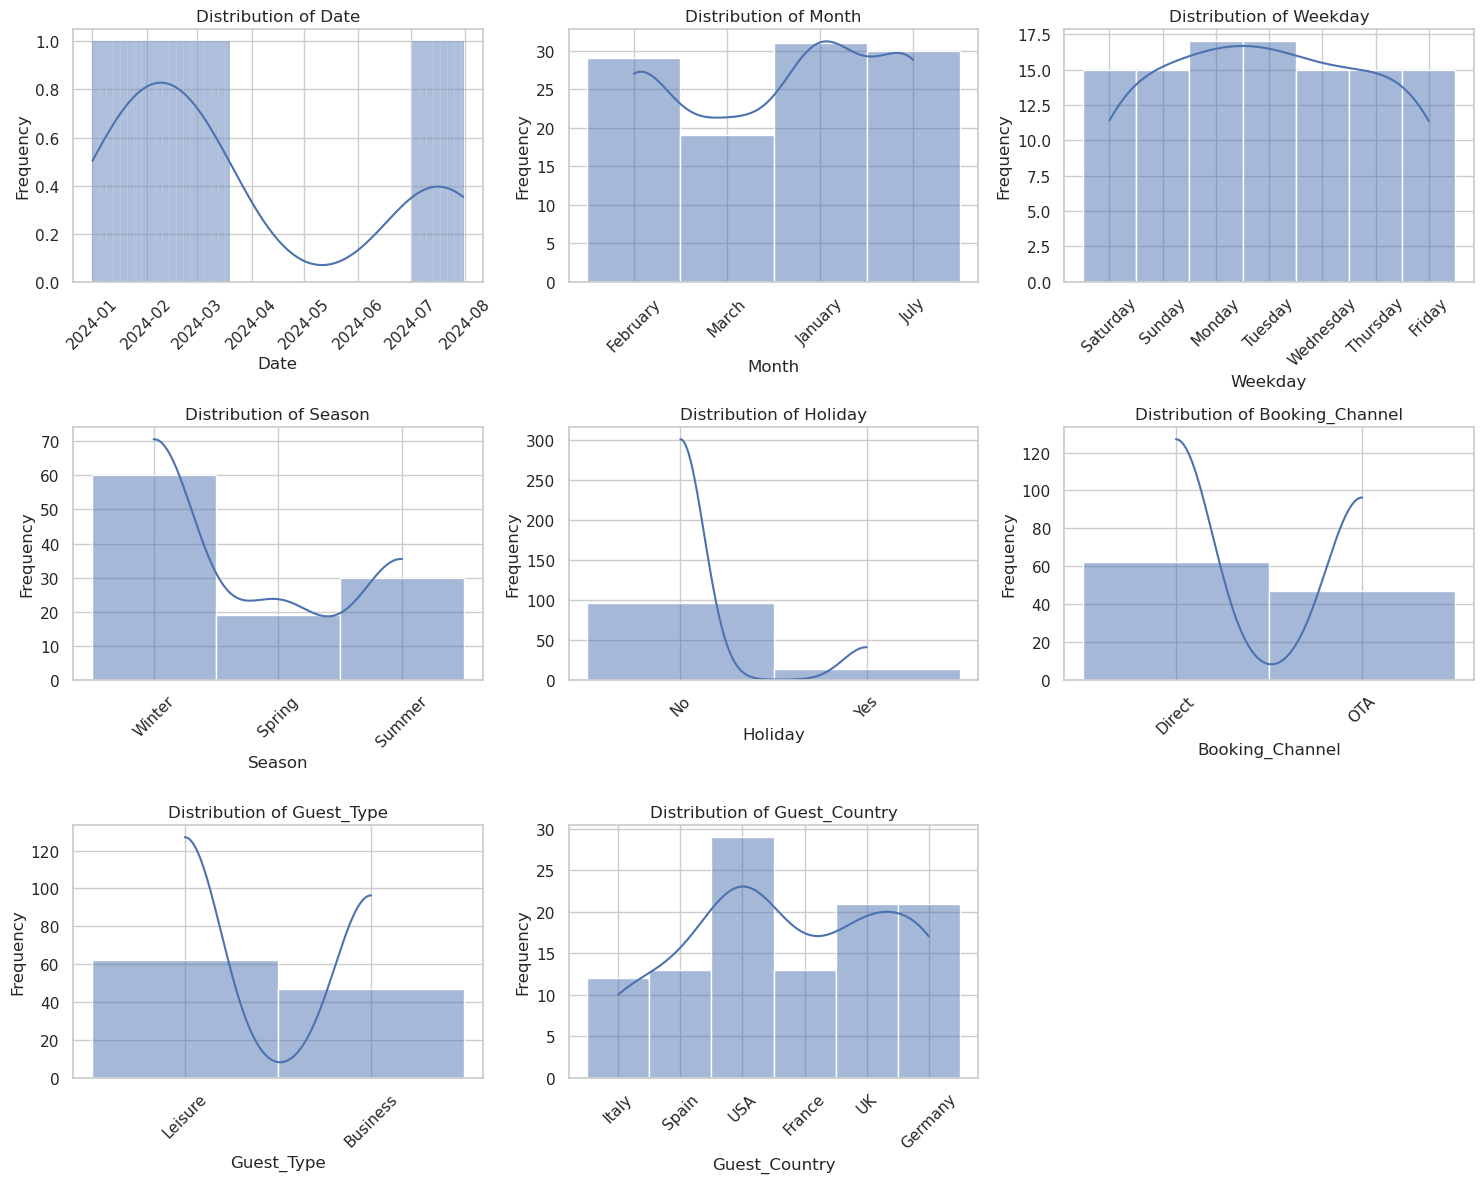

In [42]:
# visual distribution for categorical data
distribution_visuals(categoric_cols, categoric_df)

**Categorical Distribution Review**: Identified that some months (e.g., April, May) are missing due to hotel closure during low-demand periods — this aligns with the absence of corresponding records in the `Date` column, confirming data consistency.

### Data Validation Summary Post-Cleaning

- **Record Count Integrity**: Verified that the dataset still contains 109 records — no data was lost during transformation.
- **Missing Values Check**: All columns maintain the same count of missing values per row and column as before cleaning. The `Profit` column has now been populated by computing `Total_Revenue - Total_Costs`, eliminating any previously missing values.
- **Schema Validation**: All columns have been assigned appropriate data types based on their content (e.g., numeric types for revenue and costs, string types for categorical values), replacing the initial uniform string format.
- **Numerical Distribution Check**: Visual inspection of numeric features shows no abnormalities or extreme outliers. Trends observed earlier are consistent and will be further explored to understand their causes.
- **Categorical Distribution Review**: Identified that some months (e.g., April, May) are missing due to hotel closure during low-demand periods — this aligns with the absence of corresponding records in the `Date` column, confirming data consistency.
- **Label Transformation Confirmation**: Columns such as `Month`, `Weekday`, and `Holiday` were successfully transformed from numeric to descriptive labels without affecting data accuracy or count.


### Delta Table Creation and Upsert Operation
This section performs the following operations on a Delta table:
- Creates a Delta table named `hotelBook_silver` with a defined schema if it does not already exist.
- Performs an upsert operation using Delta Lake's merge functionality:
  - **Update** existing records based on matching conditions (currently empty in the provided code).
  - **Insert** new records from the DataFrame if they do not already exist in the table.


In [43]:
from pyspark.sql.types import *
from delta.tables import *

# Define the schema for the hotelBook_silver table
DeltaTable.createIfNotExists(spark) \
     .tableName("hotelBook_silver") \
     .addColumn("Date", DateType()) \
     .addColumn("Month", StringType()) \
     .addColumn("Weekday", StringType()) \
     .addColumn("Season", StringType()) \
     .addColumn("Holiday", StringType()) \
     .addColumn("Marketing_Spend", FloatType()) \
     .addColumn("Revenue", FloatType()) \
     .addColumn("Room_Revenue", FloatType()) \
     .addColumn("Occupancy_Rate", FloatType()) \
     .addColumn("ADR", FloatType()) \
     .addColumn("RevPAR", FloatType()) \
     .addColumn("Available_Rooms", IntegerType()) \
     .addColumn("Reserved_Rooms", IntegerType()) \
     .addColumn("Booking_Channel", StringType()) \
     .addColumn("Guest_Type", StringType()) \
     .addColumn("Market_Segment", FloatType()) \
     .addColumn("Guest_Country", StringType()) \
     .addColumn("Complaints", IntegerType()) \
     .addColumn("Compliment", IntegerType()) \
     .addColumn("Bookings", IntegerType()) \
     .addColumn("No_Shows", IntegerType()) \
     .addColumn("Cancellations", IntegerType()) \
     .addColumn("Checkouts", IntegerType()) \
     .addColumn("New_Bookings", IntegerType()) \
     .addColumn("Checkins", IntegerType()) \
     .addColumn("Average_Review_Score", FloatType()) \
     .addColumn("Revenue_Managed_Guests", FloatType()) \
     .addColumn("RevPAR_Managed_Guests", FloatType()) \
     .addColumn("Occupancy_Managed_Guests", FloatType()) \
     .addColumn("RevPAR_All", FloatType()) \
     .addColumn("Occupancy_All", FloatType()) \
     .addColumn("Room_Revenue_All", FloatType()) \
     .addColumn("Total_Revenue", FloatType()) \
     .addColumn("Operating_Expenses", FloatType()) \
     .addColumn("Fixed_Costs", FloatType()) \
     .addColumn("Variable_Costs", FloatType()) \
     .addColumn("Total_Costs", FloatType()) \
     .addColumn("Profit", FloatType()) \
     .execute()


StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 45, Finished, Available, Finished)

In [44]:
# Update existing records and insert new ones based on a condition defined by the columns SalesOrderNumber, OrderDate, CustomerName, and Item.

from delta.tables import *
    
deltaTable = DeltaTable.forPath(spark, 'abfss://edcd96a3-3877-4553-b100-54aeef9c4401@onelake.dfs.fabric.microsoft.com/3f561343-f018-4ab6-a09f-74d0dd933efb/Tables/hotelbook_silver')
    
dfUpdates = df
    
deltaTable.alias('silver') \
  .merge(
    dfUpdates.alias('updates'),
    'silver.Date = updates.Date and silver.Month = updates.Month and silver.Weekday = updates.Weekday'
  ) \
   .whenMatchedUpdate(set =
    {
          
    }
  ) \
 .whenNotMatchedInsert(values =
    {
      "Date": "updates.Date",
      "Month": "updates.Month",
      "Weekday": "updates.Weekday",
      "Season": "updates.Season",
      "Holiday": "updates.Holiday",
      "Marketing_Spend": "updates.Marketing_Spend",
      "Revenue": "updates.Revenue",
      "Room_Revenue": "updates.Room_Revenue",
      "Occupancy_Rate": "updates.Occupancy_Rate",
      "ADR": "updates.ADR",
      "RevPAR": "updates.RevPAR",
      "Available_Rooms": "updates.Available_Rooms",
      "Reserved_Rooms": "updates.Reserved_Rooms",
      "Booking_Channel": "updates.Booking_Channel",
      "Guest_Type": "updates.Guest_Type",
      "Market_Segment": "updates.Market_Segment",
      "Guest_Country": "updates.Guest_Country",
      "Complaints": "updates.Complaints",
      "Compliment": "updates.Compliment",
      "Bookings": "updates.Bookings",
      "No_Shows": "updates.No_Shows",
      "Cancellations": "updates.Cancellations",
      "Checkouts": "updates.Checkouts",
      "New_Bookings": "updates.New_Bookings",
      "Checkins": "updates.Checkins",
      "Average_Review_Score": "updates.Average_Review_Score",
      "Revenue_Managed_Guests": "updates.Revenue_Managed_Guests",
      "RevPAR_Managed_Guests": "updates.RevPAR_Managed_Guests",
      "Occupancy_Managed_Guests": "updates.Occupancy_Managed_Guests",
      "RevPAR_All": "updates.RevPAR_All",
      "Occupancy_All": "updates.Occupancy_All",
      "Room_Revenue_All": "updates.Room_Revenue_All",
      "Total_Revenue": "updates.Total_Revenue",
      "Operating_Expenses": "updates.Operating_Expenses",
      "Fixed_Costs": "updates.Fixed_Costs",
      "Variable_Costs": "updates.Variable_Costs",
      "Total_Costs": "updates.Total_Costs",
      "Profit": "updates.Profit"
    }
  ) \
  .execute()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 46, Finished, Available, Finished)

In [45]:
# Loading the table data into the dataframe
df = spark.read.table("Hotel.hotelbook_silver")
df.limit(5).toPandas()

StatementMeta(, b62fbc47-b423-4c88-a2bc-56c8cb002ab9, 47, Finished, Available, Finished)

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,Profit
0,2024-02-10,February,Saturday,Winter,No,65000.0,88000.0,49000.0,0.79,128.0,...,79.0,4.5,0.79,49000.0,55000.0,12000.0,6000.0,73000.0,15000.0,40000.0
1,2024-02-11,February,Sunday,Winter,No,70000.0,91000.0,50000.0,0.81,134.0,...,81.0,4.7,0.81,50000.0,57000.0,11500.0,7000.0,75500.0,15500.0,41500.0
2,2024-02-12,February,Monday,Winter,No,50000.0,80000.0,45000.0,0.75,120.0,...,75.0,4.5,0.75,45000.0,50000.0,10000.0,5000.0,65000.0,15000.0,35000.0
3,2024-02-13,February,Tuesday,Winter,No,55000.0,82000.0,47000.0,0.77,122.0,...,77.0,4.6,0.77,47000.0,53000.0,11000.0,5000.0,69000.0,13000.0,40000.0
4,2024-02-14,February,Wednesday,Winter,No,65000.0,88000.0,49000.0,0.79,128.0,...,79.0,4.5,0.79,49000.0,55000.0,12000.0,6000.0,73000.0,15000.0,40000.0
